In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
%cd /gdrive/My Drive/Thesis_Resources/Notebooks

/gdrive/My Drive/Thesis_Resources/Notebooks


In [3]:
import ee
import datetime
import requests
import matplotlib.pyplot as plt
import math

In [4]:
ee.Authenticate()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=e6OrUmhdgnge-BmUAGmXtJnHR6zZ1pVFraVHJD8MFuI&tc=ulm3v1gLyLjUwB61iC6yNgzl1BOhP0UXsSO7cVTwOyI&cc=P9vbgm0jeqyyC3tLp37EzHRqt54OOSyXDq2il_pRUg0

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AfJohXnUQwop7A3S5gu-fqlSrf96G0AhQI1O_PMWBM_b0O7x_nEClIz-lHU

Successfully saved authorization token.


In [5]:
ee.Initialize()

In [6]:
def fetch_and_display_images(lat, lon, before_start, before_end, after_start, after_end, title, region_radius=50, scale=100):
    # Fetch and display 'before' image
    fetch_and_display_image(lat, lon, before_start, before_end, f"{title.replace(' ', '_')}_before.jpg", f"{title} (Before)", region_radius, scale)

    # Fetch and display 'after' image
    fetch_and_display_image(lat, lon, after_start, after_end, f"{title.replace(' ', '_')}_after.jpg", f"{title} (After)", region_radius, scale)

def fetch_and_display_image(lat, lon, start_date, end_date, filename, title, region_radius, scale):
    # Define the region of interest
    region = ee.Geometry.Point([lon, lat]).buffer(region_radius)

    # Fetch the Landsat 8 image collection
    collection = (ee.ImageCollection('LANDSAT/LC08/C01/T1_TOA')
                  .filterDate(ee.Date(start_date), ee.Date(end_date))
                  .filterBounds(region)
                  .sort('CLOUD_COVER'))  # Sort by cloud cover in ascending order

    # Take the first image (with the least cloud cover) from the sorted collection
    image = ee.Image(collection.first())

    # Define visualization parameters
    vis_params = {
        'bands': ['B4', 'B3', 'B2'], # RGB bands
        'min': 0,
        'max': 0.3,
        'scale': scale
    }

    # Get the URL for the image
    url = image.getThumbURL(vis_params)

    # Download and save the image
    response = requests.get(url)
    with open(filename, 'wb') as file:
        file.write(response.content)

    # Display the image using matplotlib
    img = plt.imread(filename)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()


In [ ]:
# Fetching and displaying images for each landslide event

# Oso, Washington, USA (2014)
fetch_and_display_images(48.2905, -121.8085, '2014-01-01', '2014-03-01', '2014-03-23', '2014-06-30', 'Oso, Washington')

# Sunkoshi Blockade, Nepal (2014)
fetch_and_display_images(27.6254, 85.5207, '2014-06-01', '2014-07-31', '2014-08-01', '2014-09-30', 'Sunkoshi Blockade, Nepal')

# Sierra Leone (2017)
fetch_and_display_images(8.4844, -13.2299, '2017-06-01', '2017-07-31', '2017-08-01', '2017-09-30', 'Sierra Leone')

# Guatemalan Landslides (2015)
fetch_and_display_images(14.6349, -90.5069, '2015-07-01', '2015-09-30', '2015-10-01', '2015-12-31', 'Guatemala 2015')

# Guatemalan Landslides (2020)
fetch_and_display_images(14.6349, -90.5069, '2020-08-01', '2020-10-31', '2020-11-01', '2021-01-31', 'Guatemala 2020')

# Kerala, India (2018)
fetch_and_display_images(10.8505, 76.2711, '2018-04-01', '2018-06-30', '2018-07-01', '2018-09-30', 'Kerala, India 2018')

# Kerala, India (2019)
fetch_and_display_images(10.8505, 76.2711, '2019-04-01', '2019-06-30', '2019-07-01', '2019-09-30', 'Kerala, India 2019')

# Norway (2020)
fetch_and_display_images(69.9689, 23.2717, '2020-04-01', '2020-05-31', '2020-06-01', '2020-08-31', 'Norway 2020')

# Japan (2021)
fetch_and_display_images(35.0996, 139.0856, '2021-05-01', '2021-06-30', '2021-07-01', '2021-09-30', 'Japan 2021')

In [ ]:
def fetch_image(lat, lon, date_from, date_to, filename, region_radius=500, scale=100):
    # Define the region of interest
    region = ee.Geometry.Point([lon, lat]).buffer(region_radius)

    # Fetch the Landsat 8 image collection
    collection = (ee.ImageCollection('LANDSAT/LC08/C01/T1_TOA')
                  .filterDate(ee.Date(date_from), ee.Date(date_to))
                  .filterBounds(region))

    # Take the first image from the collection
    image = ee.Image(collection.first())

    # Define visualization parameters
    vis_params = {
        'bands': ['B4', 'B3', 'B2'], # RGB bands
        'min': 0,
        'max': 0.3,
        'scale': scale
    }

    # Get the URL for the image
    url = image.getThumbURL(vis_params)

    # Download and save the image
    response = requests.get(url)
    with open(filename, 'wb') as file:
        file.write(response.content)

    # Display the image using matplotlib
    img = plt.imread(filename)
    plt.imshow(img)
    plt.title(filename)
    plt.axis('off')
    plt.show()

# Oso, Washington coordinates
LAT, LON = 48.2905, -121.8085

# Fetch, save, and display images before and after the landslide
fetch_image(LAT, LON, '2014-02-01', '2014-03-01', 'image_before.jpg')
fetch_image(LAT, LON, '2014-03-23', '2014-04-30', 'image_after.jpg')


In [ ]:
# Fetching and displaying images for each landslide event

# Oso, Washington, USA (2014)
fetch_and_display_images(48.2905, -121.8085, '2014-01-01', '2014-03-01', '2014-03-23', '2014-06-30', 'Oso, Washington')

# Sunkoshi Blockade, Nepal (2014)
fetch_and_display_images(27.6254, 85.5207, '2014-06-01', '2014-07-31', '2014-08-01', '2014-09-30', 'Sunkoshi Blockade, Nepal')

# Sierra Leone (2017)
fetch_and_display_images(8.4844, -13.2299, '2017-06-01', '2017-07-31', '2017-08-01', '2017-09-30', 'Sierra Leone')

# Guatemalan Landslides (2015)
fetch_and_display_images(14.6349, -90.5069, '2015-07-01', '2015-09-30', '2015-10-01', '2015-12-31', 'Guatemala 2015')

# Guatemalan Landslides (2020)
fetch_and_display_images(14.6349, -90.5069, '2020-08-01', '2020-10-31', '2020-11-01', '2021-01-31', 'Guatemala 2020')

# Kerala, India (2018)
fetch_and_display_images(10.8505, 76.2711, '2018-04-01', '2018-06-30', '2018-07-01', '2018-09-30', 'Kerala, India 2018')

# Kerala, India (2019)
fetch_and_display_images(10.8505, 76.2711, '2019-04-01', '2019-06-30', '2019-07-01', '2019-09-30', 'Kerala, India 2019')

# Norway (2020)
fetch_and_display_images(69.9689, 23.2717, '2020-04-01', '2020-05-31', '2020-06-01', '2020-08-31', 'Norway 2020')

# Japan (2021)
fetch_and_display_images(35.0996, 139.0856, '2021-05-01', '2021-06-30', '2021-07-01', '2021-09-30', 'Japan 2021')

In [43]:
def fetch_and_display_images(lat, lon, before_start, before_end, after_start, after_end, title, region_radius=500, scale=10):
    # Fetch and display 'before' image
    fetch_and_display_image(lat, lon, before_start, before_end, f"{title.replace(' ', '_')}_before.jpg", f"{title} (Before)", region_radius, scale)

    # Fetch and display 'after' image
    fetch_and_display_image(lat, lon, after_start, after_end, f"{title.replace(' ', '_')}_after.jpg", f"{title} (After)", region_radius, scale)

def fetch_and_display_image(lat, lon, start_date, end_date, filename, title, region_radius, scale):
    # Define the region of interest
    region = ee.Geometry.Point([lon, lat]).buffer(region_radius)

    # Fetch the Sentinel-2 image collection
    collection = (ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
                  .filterDate(ee.Date(start_date), ee.Date(end_date))
                  .filterBounds(region)
                  #.filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10))  # Filter images with cloud cover less than 10%
                  #.sort('CLOUDY_PIXEL_PERCENTAGE')
                  )  # Sort by cloud cover in ascending order

    # Check if there are any images available after filtering
    count = collection.size().getInfo()
    if count == 0:
        print(f"No images available for {title} within the specified cloud cover threshold.")
        return

    # Take the first image (with the least cloud cover) from the sorted collection and clip it to the region
    image = ee.Image(collection.first()).clip(region)

    # Define visualization parameters
    vis_params = {
        'bands': ['B4', 'B3', 'B2'], # RGB bands
        'min': 0,
        'max': 3000,
        'scale': scale
    }

    # Get the URL for the image
    url = image.getThumbURL(vis_params)

    # Download and save the image
    response = requests.get(url)
    with open(filename, 'wb') as file:
        file.write(response.content)

   # Display the image using matplotlib
    img = plt.imread(filename)
    plt.imshow(img)

    # Get the shape of the image
    height, width, _ = img.shape

    # Add a red marker at the center of the image
    #plt.plot(width // 2, height // 2, 'ro', markersize=10)

    plt.title(title)
    plt.axis('off')
    plt.show()


In [22]:
# north india landslides india 2013
fetch_and_display_images(27.9944024, 84.1526496, '2014-05-01', '2014-06-10', '2014-06-18', '2014-10-30', 'India, North India')

No images available for India, North India (Before) within the specified cloud cover threshold.
No images available for India, North India (After) within the specified cloud cover threshold.


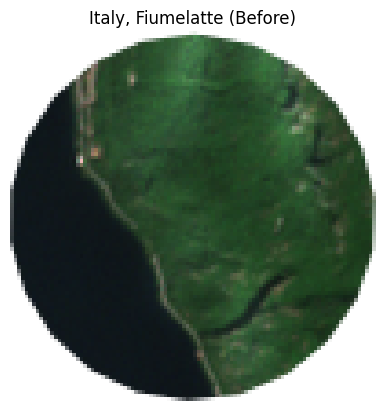

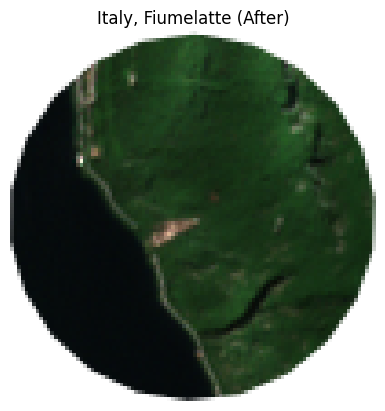

In [44]:
# Italy Fiumelatte
fetch_and_display_images(45.985518, 9.296162, '2023-05-05', '2023-05-07', '2023-05-25', '2023-05-27', 'Italy, Fiumelatte')

In [14]:
# Importing all necessary libraries
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [15]:
# Define file paths for the images
img1_path = 'Italy,_Fiumelatte_before.jpg'
img2_path = 'Italy,_Fiumelatte_after.jpg'

In [16]:
# Load the images
img1_np = np.array(Image.open(img1_path).convert('RGB'))
img2_np = np.array(Image.open(img2_path).convert('RGB'))

# Flatten the images to prepare dataset
img1_flatten = img1_np.reshape(-1, 3)
img2_flatten = img2_np.reshape(-1, 3)

# Create a dataset combining the pixel values of both images
X = np.hstack((img1_flatten, img2_flatten))

# Define a threshold for image differencing
threshold = 100

# Use simple image differencing to create labels
y = np.any(np.abs(img1_flatten - img2_flatten) > threshold, axis=1).astype(int)

# Split data for training and testing
split_ratio = 0.8
split_idx = int(len(X) * split_ratio)

X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classificationRep = classification_report(y_test, y_pred)

print(accuracy)
print(classificationRep)

0.999009900990099
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2014
           1       1.00      0.67      0.80         6

    accuracy                           1.00      2020
   macro avg       1.00      0.83      0.90      2020
weighted avg       1.00      1.00      1.00      2020



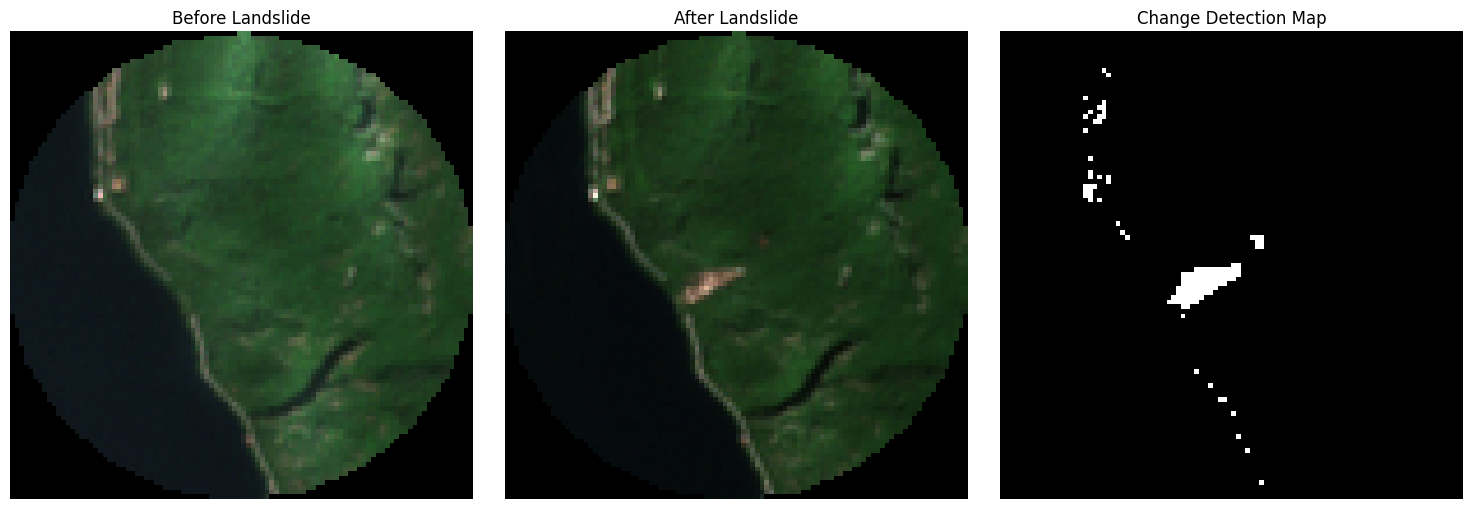

In [17]:
# Predict changes for the entire dataset
y_full_pred = clf.predict(X)

# Reshape the predictions to obtain a change map
change_map = y_full_pred.reshape(img1_np.shape[:2])

# Visualize the original images and the change map
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Display "before" image
ax[0].imshow(img1_np)
ax[0].set_title('Before Landslide')
ax[0].axis('off')

# Display "after" image
ax[1].imshow(img2_np)
ax[1].set_title('After Landslide')
ax[1].axis('off')

# Display change map
ax[2].imshow(change_map, cmap='gray')
ax[2].set_title('Change Detection Map')
ax[2].axis('off')

plt.tight_layout()
plt.show()